###实现原理参考李航《统计学习方法》第七章支持向量机

The parameter of polynomial is: 1
[0 0] predicted result is: 1.0
[1 1] predicted result is: -1.0
[0 1] predicted result is: 1.0
[1 0] predicted result is: 1.0
The accuracy is: 0.25
The parameter of polynomial is: 2
[0 0] predicted result is: 1.0
[1 1] predicted result is: 1.0
[0 1] predicted result is: -1.0
[1 0] predicted result is: -1.0
The accuracy is: 1.0
The minimum value of p is: 2


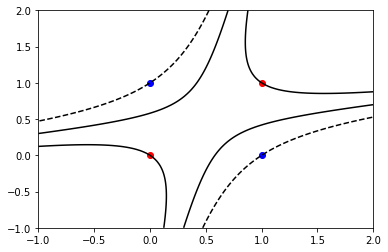

In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

class SVM:
  def polynomial(self, x, y, p):
    return (1 + np.dot(x, y))**p

  def __init__(self, x, y, p=2):
    self.x = x
    self.y = y
    self.G = np.dot(self.y, y.T) * self.polynomial(self.x, self.x.T, 2)
    self.m = len(self.y) 
    self.d = self.x.shape[1] 
    self.a = cp.Variable(shape=(self.m,1),pos=True)
    self.C = 100
    self.p = p
  
  def train(self, x, y):
    objective = cp.Maximize(cp.sum(self.a)-(1/2)*cp.quad_form(self.a, self.G))
    constraints = [self.a <= self.C, cp.sum(cp.multiply(self.a,self.y)) == 0] # box constraint
    prob = cp.Problem(objective, constraints)
    result = prob.solve()
    # print(self.a.value)
  
  def predict(self, t):
    for i, data in enumerate(self.a.value):
      if data > 0 and data < self.C:
        break
    b = self.y[0][i] - sum([self.a.value[j][0] * self.y[j] * self.polynomial(self.x[i], self.x[j], self.p) for j in range(len(self.x))])
    res = (sum([self.a.value[j][0] * self.y[j] * self.polynomial(t, self.x[j], self.p) for j in range(len(self.x))]) + b)[0]
    return np.sign(res)
  
  def score(self, t, y):
    ans = []
    for data in t:
      ans.append(self.predict(data))
    ans = np.array(ans)
    count = 0
    for i in range(len(t)):
      if ans[i] == y[i]:
        count += 1
    return count / len(t)
  
  def plot(self):
    dataset = np.hstack((self.x, self.y))
    
    positive = np.array([[0,0,0]])
    negative = np.array([[0,0,0]])
    for i in range(x.shape[0]):
      if(dataset[i][2]==1):
        positive = np.row_stack((positive,np.array([dataset[i]])))
      else:
        negative = np.row_stack((negative,np.array([dataset[i]])))
    possitive = positive[1:, :2]
    negative = negative[1:, :2]
    d = 2
    plt.scatter(possitive[:,0], possitive[:,1], color='red')
    plt.scatter(negative[:,0], negative[:,1], color='blue')

    a_result = self.a.value
    support_vectors = np.zeros(2)
    support_weight = np.zeros(1)
    for i in range(a_result.shape[0]):
      if a_result[i] > 0:
        support_vectors = np.row_stack((support_vectors, self.x[i]))
        support_weight = np.row_stack((support_weight, a_result[i] * self.y[i]))
    support_vectors = support_vectors[1:]
    support_weight = support_weight[1:]
    
    grid_x = np.linspace(-1,2,100)
    grid_y = np.linspace(-1,2,100)
    grid = np.dstack(np.meshgrid(grid_x, grid_y)).reshape(-1, 2)
    q = np.zeros(1)
    a_result[a_result<10**-3] = 0
    for j in range(support_vectors.shape[0]):
        p = np.zeros(1)
        for i in range(support_vectors.shape[0]):
          p += support_weight[i] * self.polynomial(support_vectors[i], support_vectors[j].T ,self.p)
        for i in range(a_result.shape[0]):
            if a_result[i] > 0:
                q = self.y[i]-p
    X, Y = np.meshgrid(grid_x,grid_y)
    result_con=[]
    for j in range(grid.shape[0]):
      result = np.zeros(1)
      for i in range(support_vectors.shape[0]):
        result += support_weight[i] * self.polynomial(support_vectors[i],grid[j].T,self.p)
          
      result_con.append(result+q)
    result_con = np.array(result_con)
    result_con = result_con.reshape(X.shape)
    plt.contour(X, Y, result_con, [-1,0,1], colors=['k'])

if __name__ == "__main__":
  x=np.array([[0,0], [1,1], [0,1], [1,0]])
  y=np.array([[1], [1], [-1], [-1]])
  for j in range(1, 10): 
    svm = SVM(x, y, j)
    svm.train(x, y)
    print("The parameter of polynomial is:", j)
    for i in range(len(x)):
      print(x[i], "predicted result is:", svm.predict(x[i]))
    print("The accuracy is:", svm.score(x, y))
    if svm.score(x, y) == 1.0:
      break
  print("The minimum value of p is:", j)
  svm.plot()